<a href="https://colab.research.google.com/github/AkarshBongarala/Assignment/blob/main/Dimension_Measurement_of_cracks_Braynix(updated_23_10_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                )
from collections import deque
import random as rng
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import imutils
from scipy import ndimage
from itertools import combinations
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from skimage.morphology import skeletonize, thin,medial_axis


rng.seed(12345)

In [6]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,16), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray")
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap="gray")
    ax2.set_title(filter_name)
    ax2.axis('off')

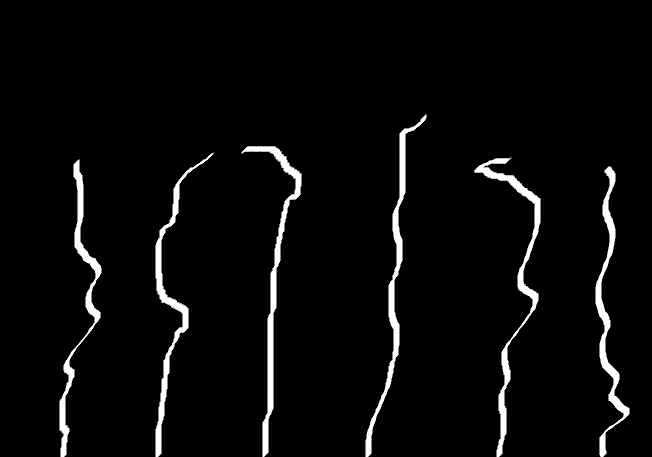

-1

In [7]:
image = cv2.imread('1.png')
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)

gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display original image
cv2_imshow(gray)
cv2.waitKey(0)



In [8]:
#cv2_imshow(blurred)

In [9]:
#img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#wide = cv2.Canny(blurred, 150, 30)
#mid = cv2.Canny(blurred, 300, 50)
#tight = cv2.Canny(blurred, 240, 50)
# show the output Canny edge maps
#cv2_imshow(tight)

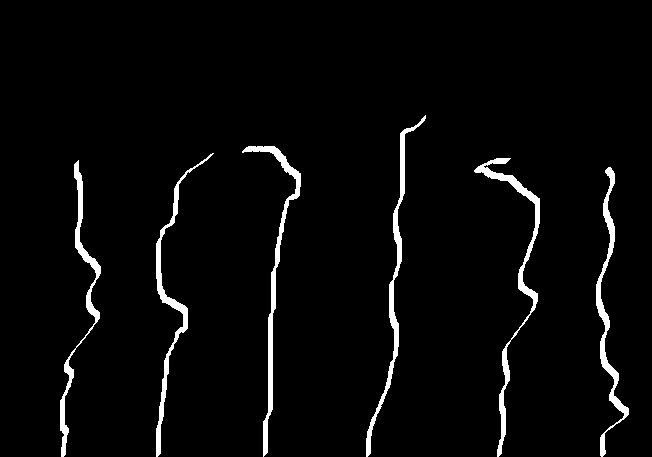

(457, 652)

In [10]:
# apply binary thresholding
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()
thresh.shape

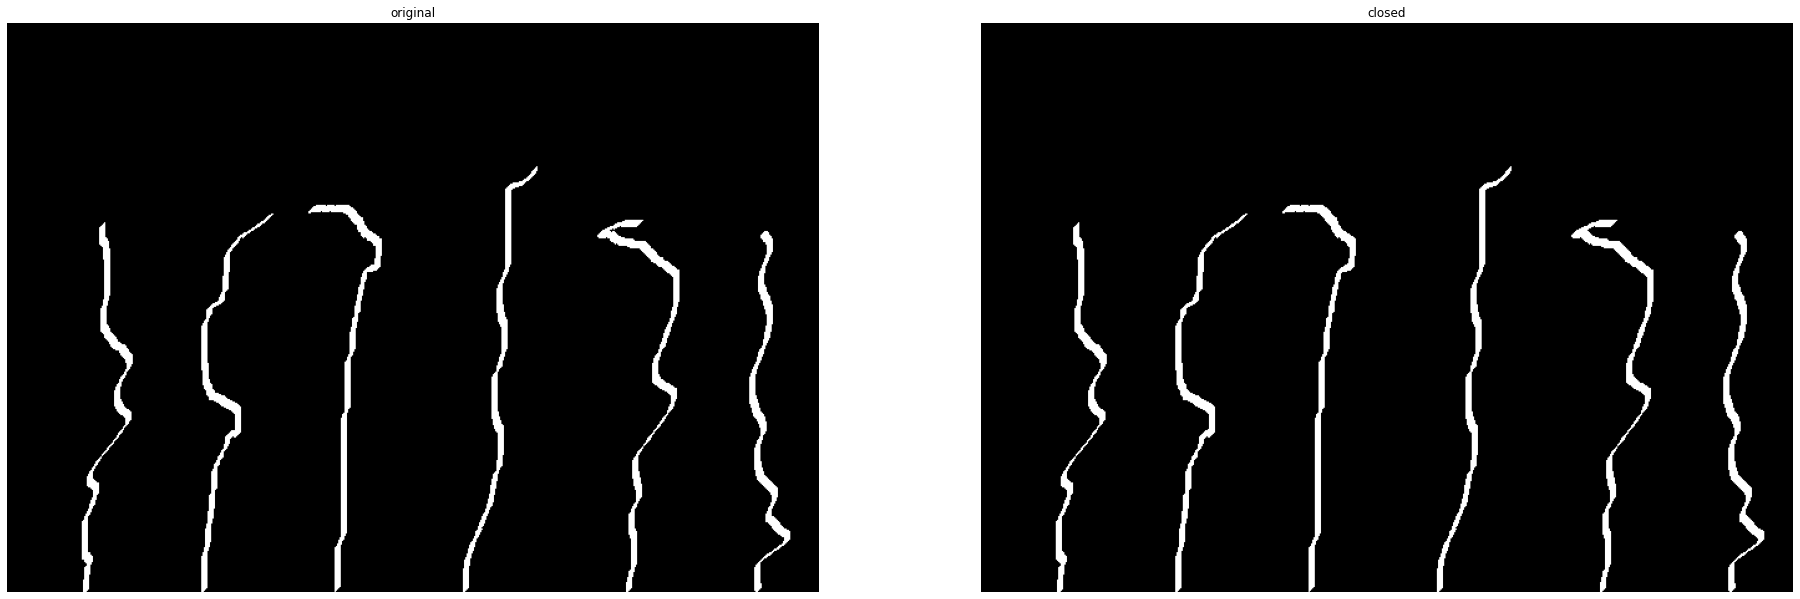

In [11]:
closed = closing(thresh)
plot_comparison(thresh, closed, 'closed')


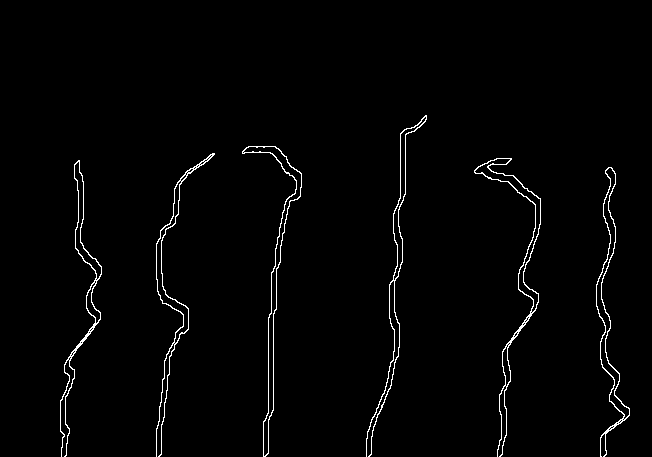

(457, 652)

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

gradient = cv2.morphologyEx(closed, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradient)

gradient.shape

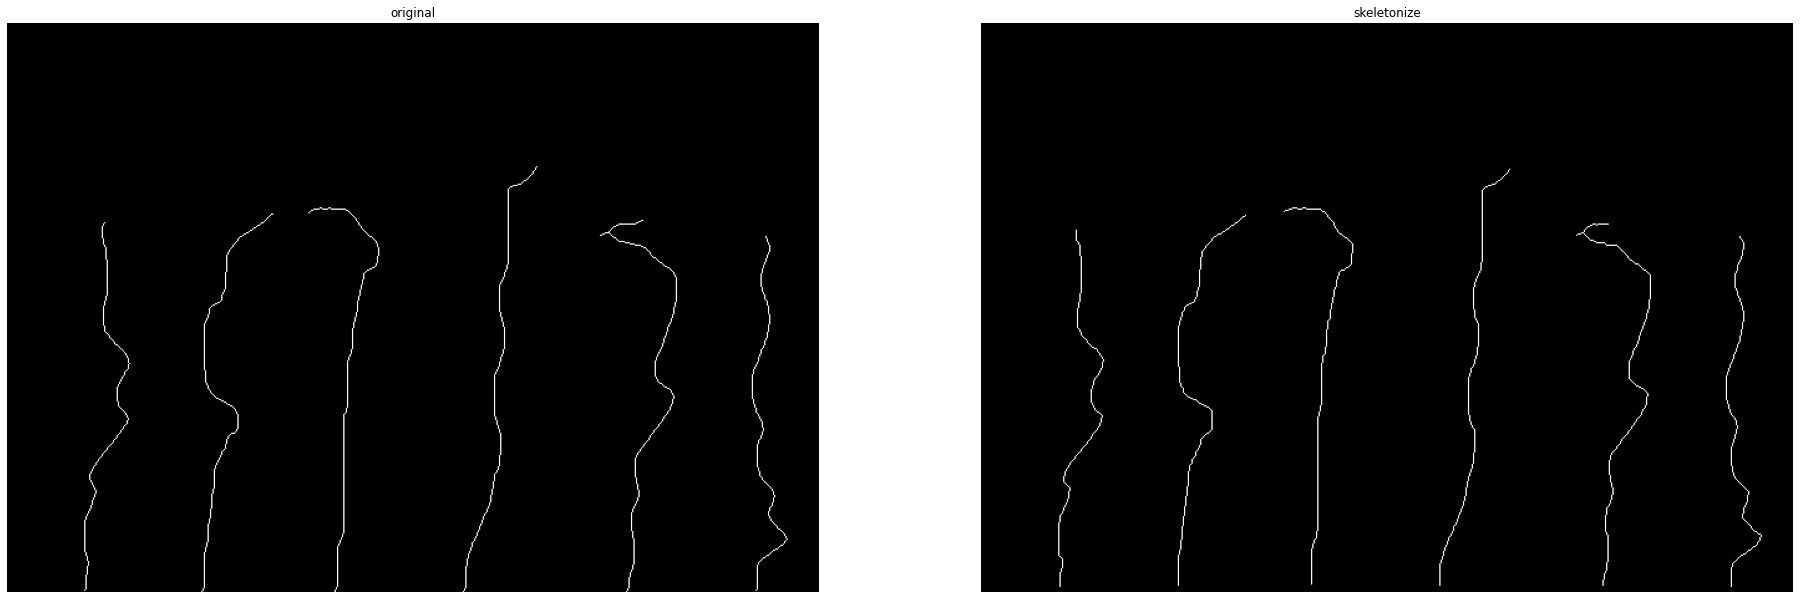

In [13]:
skeleton = skeletonize(closed,method='lee')
thinned = thin(closed)
sk  = skeletonize(image)
plot_comparison(thinned, skeleton, 'skeletonize')

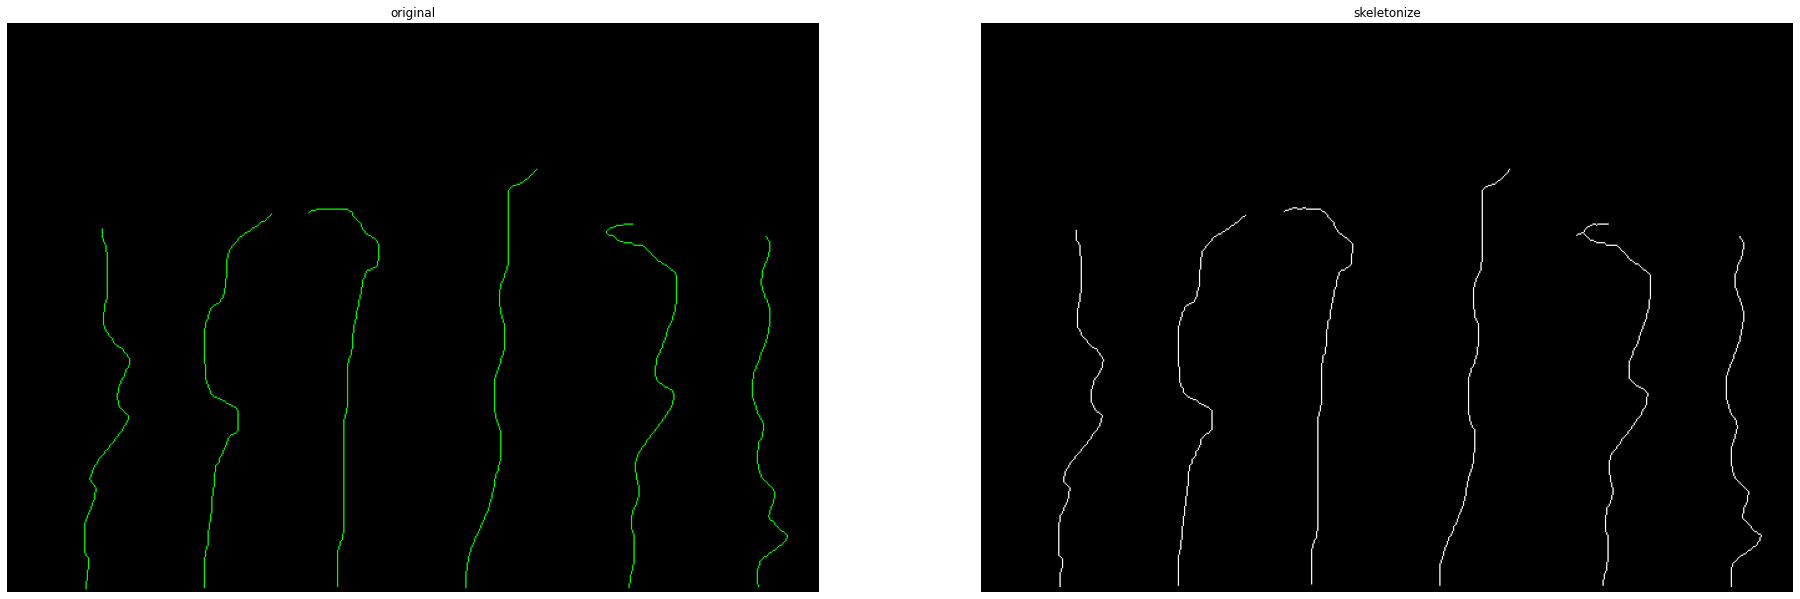

In [14]:
plot_comparison(sk, skeleton, 'skeletonize')

In [15]:
ind= cv2.distanceTransform(255-closed, cv2.DIST_L1, 5)
ind1= cv2.distanceTransform(255-closed, cv2.DIST_L2, 5)


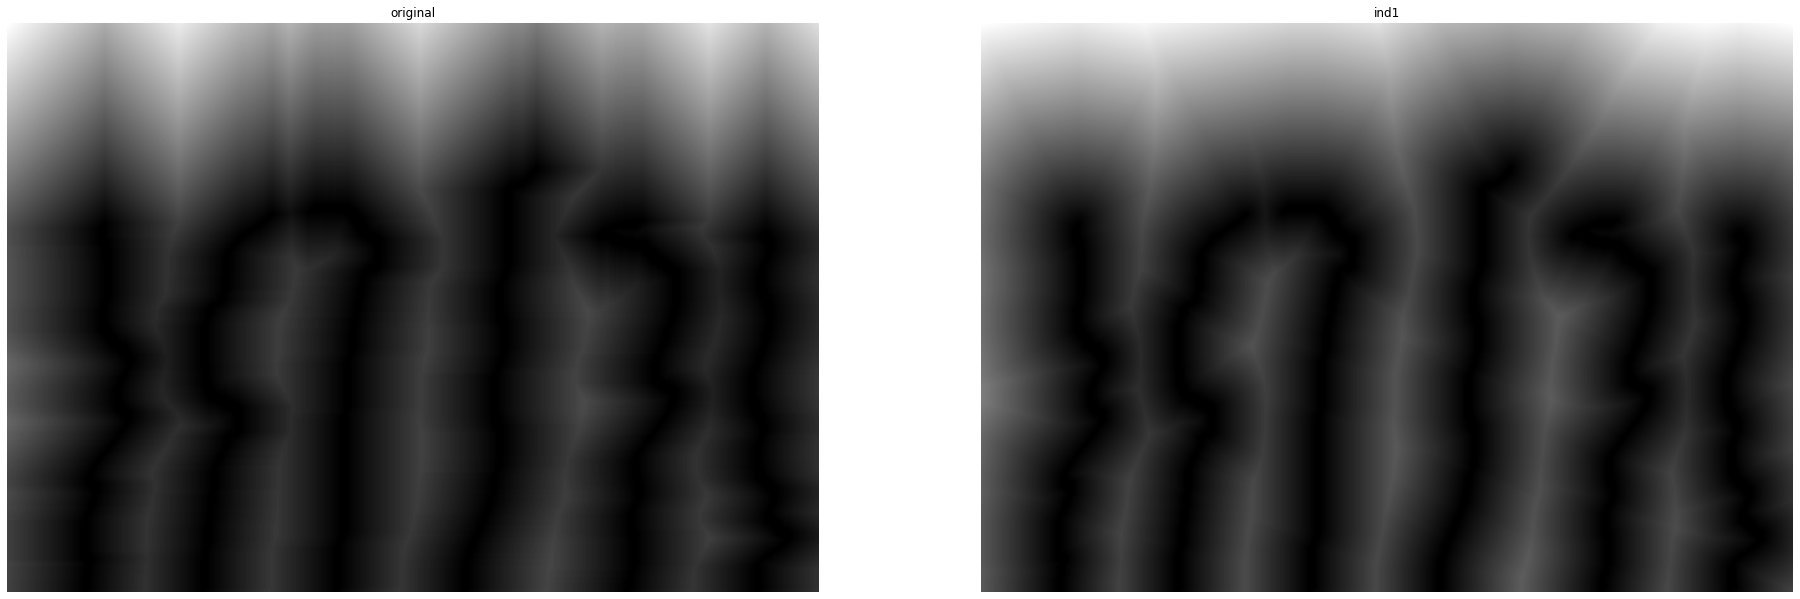

In [16]:
plot_comparison(ind, ind1, 'ind1')

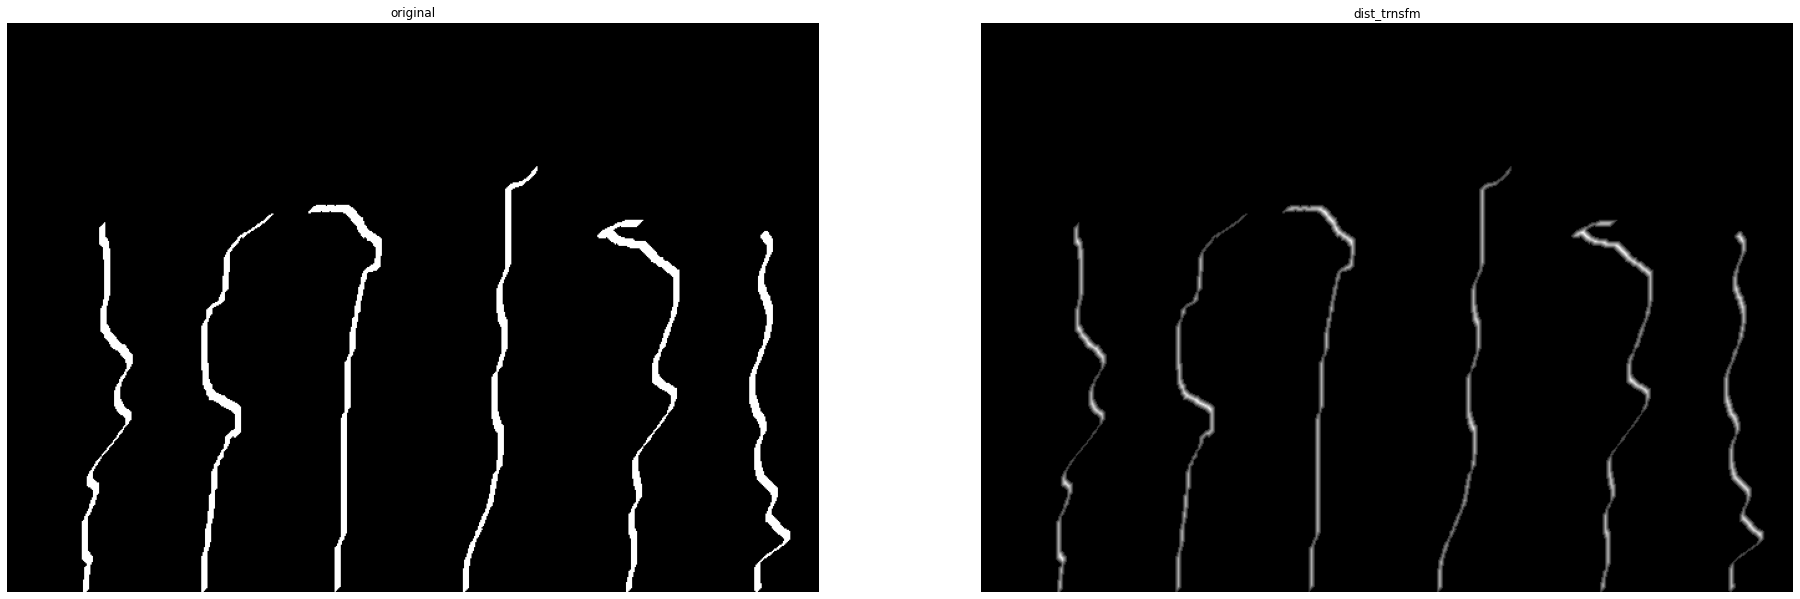

In [17]:
ind2= cv2.distanceTransform(closed, cv2.DIST_L2, 5)

plot_comparison(closed, ind2, 'dist_trnsfm')

In [18]:
ind2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

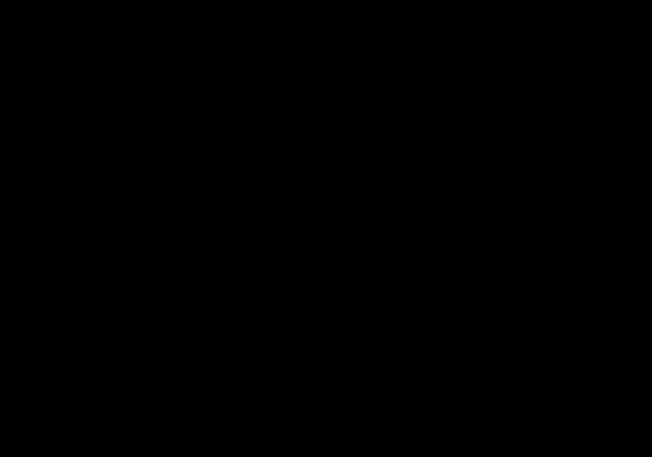

In [19]:
contours, hierarchy = cv2.findContours(skeleton, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
img_contours = np.zeros(image.shape)
cv2_imshow(img_contours)


length of crack1 =  327.1787133216858
length of crack2 =  327.9360725879669
length of crack3 =  381.8771973848343
length of crack4 =  353.4507910013199
length of crack5 =  360.4385986328125
length of crack6 =  368.1665207147598


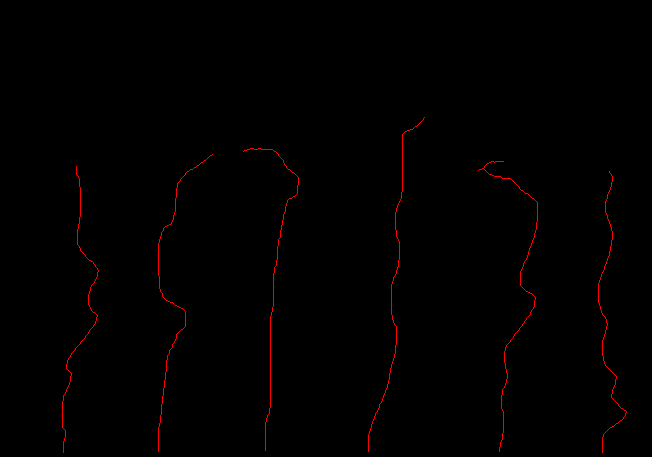

In [20]:
i = 0
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.0001 * perimeter, True)
    
    dc = cv2.drawContours(img_contours,[approx], -1, (0, 0, 255), 1)
    cv2.imwrite('contour {}.jpg'.format(i+1), dc)
    print("length of crack{} = ".format(i+1),perimeter/2)
    i += 1
cv2_imshow(img_contours)